In [1]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
from helper import charts

pd.options.display.precision = 2

In [2]:
# Import the dataset.
df = pd.read_csv(filepath_or_buffer="https://download.mlcc.google.com/mledu-datasets/california_housing_train.csv")

## Data exploration
Taking a look at the data, trying to identify potential problems, outliers, biases and other things that could have an influence on the ML model.

In [3]:
#peek at the data
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,-114.31,34.19,15.0,5612.0,1283.0,1015.0,472.0,1.49,66900.0
1,-114.47,34.40,19.0,7650.0,1901.0,1129.0,463.0,1.82,80100.0
2,-114.56,33.69,17.0,720.0,174.0,333.0,117.0,1.65,85700.0
3,-114.57,33.64,14.0,1501.0,337.0,515.0,226.0,3.19,73400.0
4,-114.57,33.57,20.0,1454.0,326.0,624.0,262.0,1.93,65500.0


In [4]:
df.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,17000.00,17000.00,17000.00,17000.00,17000.00,17000.00,17000.00,17000.00,17000.00
mean,-119.56,35.63,28.59,2643.66,539.41,1429.57,501.22,3.88,207300.91
std,2.01,2.14,12.59,2179.95,421.50,1147.85,384.52,1.91,115983.76
min,-124.35,32.54,1.00,2.00,1.00,3.00,1.00,0.50,14999.00
25%,-121.79,33.93,18.00,1462.00,297.00,790.00,282.00,2.57,119400.00
50%,-118.49,34.25,29.00,2127.00,434.00,1167.00,409.00,3.54,180400.00
75%,-118.00,37.72,37.00,3151.25,648.25,1721.00,605.25,4.77,265000.00
max,-114.31,41.95,52.00,37937.00,6445.00,35682.00,6082.00,15.00,500001.00


In [5]:
#checking for NaN values in columns
df.isna().sum()

longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
median_house_value    0
dtype: int64

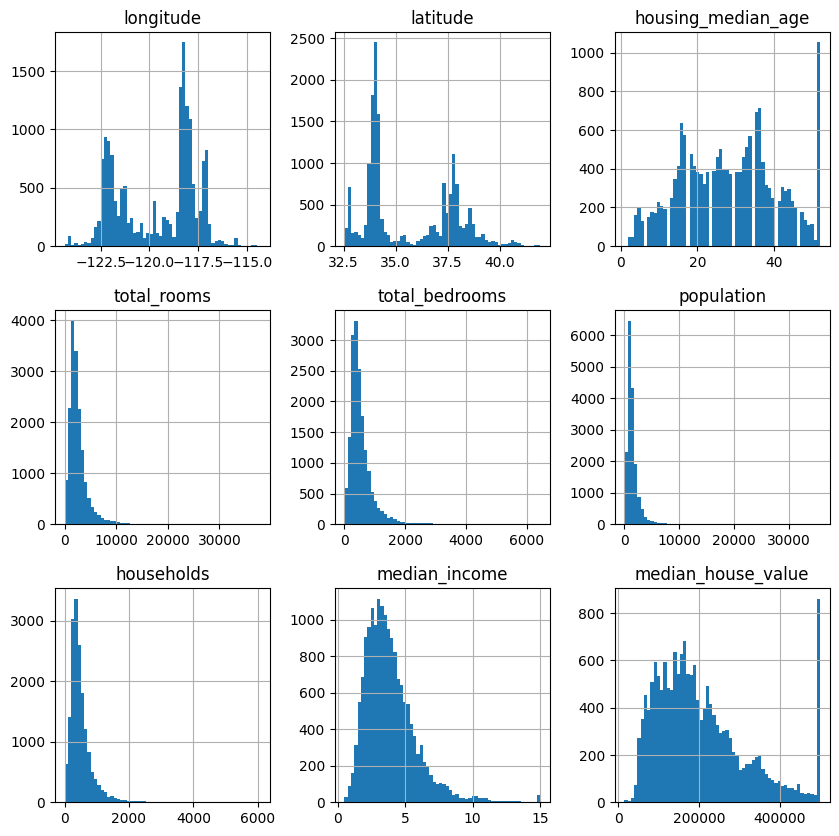

In [6]:
#feature distribution with binning
df.hist(bins=60, figsize=(10,10))
plt.show()

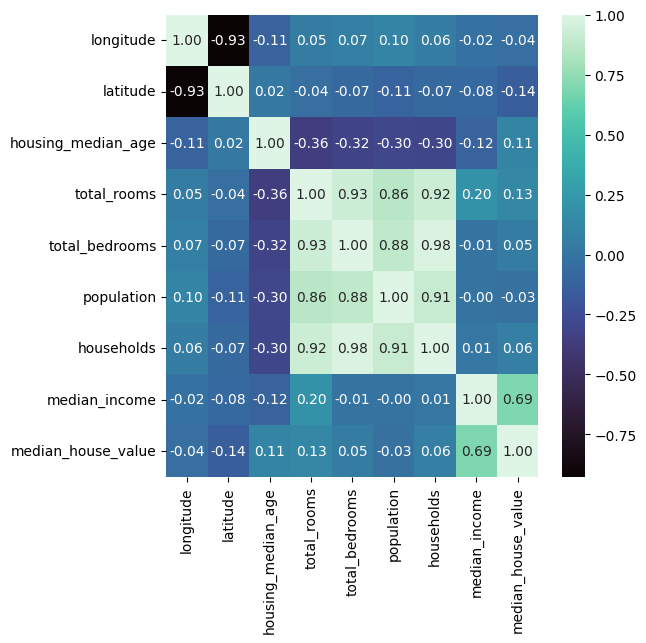

In [7]:
charts.plot_heatmap_from_df(df=df)

## Data cleaning
The aim is to remove data anomalies that are likely not caused by the actual housing market, but instead by some measuring error. 

In [8]:
#Removing duplicates in place
df_length = len(df.index)

df.drop_duplicates(inplace=True)

tmp_df_length = len(df.index)

print("Duplicates:", df_length, "-", tmp_df_length, "=", df_length - tmp_df_length)

Duplicates: 17000 - 17000 = 0


In [9]:
#remove really high values
df.std()

longitude                  2.01
latitude                   2.14
housing_median_age        12.59
total_rooms             2179.95
total_bedrooms           421.50
population              1147.85
households               384.52
median_income              1.91
median_house_value    115983.76
dtype: float64